Se registró cada usuario al que se le mostró la publicidad, y se pudo obtener datos de la persona tales como género, edad y salario estimado. Además se registró si el usuario luego compró el producto que la publicidad hacía referencia. Los datos están en Social_Network_Ads.csv. Se busca poder predecir dado un usuario con datos socioeconómicos si va a comprar o no el producto.

In [ ]:
"""
Este script permite realizar la ingeniería de características
necesarias para la implementación de los modelos de clasificación
KNN y logística sobre el set de datos.
"""

In [50]:
# Se importan las librerias necesarias
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Carga la ruta al archivo de datos
ruta = os.path.dirname((os.path.abspath('data_features')))
ruta_datos = os.path.join(ruta, "dataset/Social_Network_Ads.csv")

# Lectura del archivo a DataFrame
social_net = pd.read_csv(ruta_datos)

In [52]:
# Visualizacion de los primeros registros
social_net.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [53]:
# Informacion del dataset
social_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [54]:
# Genera el mapa de calor de datos faltantes
def mapa_calor_faltantaes(df):
  """
  Genera el mapa de calor para visualizar
  donde se alojan los datos faltantes.

  :param:
  :df: DataFrame con los atributos.
  """
  try:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Mapa de Calor de Datos Faltantes')
    plt.xlabel('Columna')
    plt.ylabel('Registro')
    plt.show()

  except:
    print('No se ha podido realizar el gráfico.')  

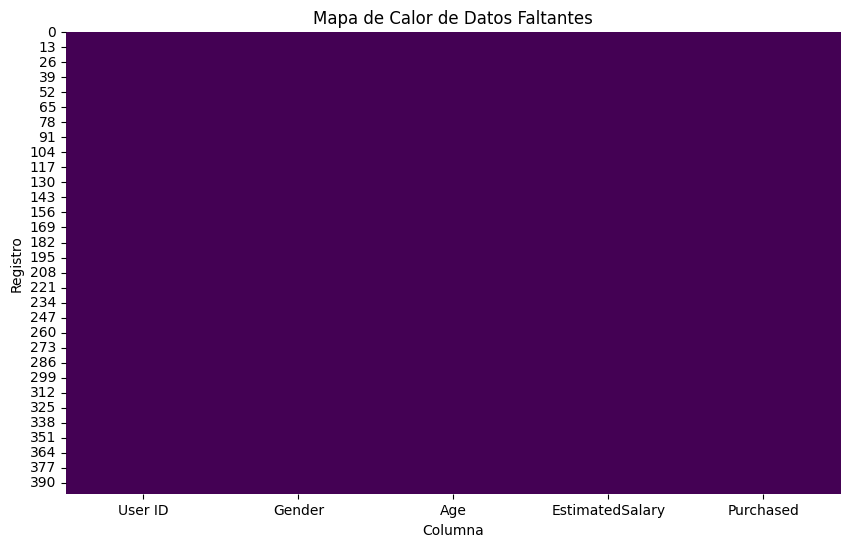

In [55]:
mapa_calor_faltantaes(social_net)

In [56]:
# Verifica si hay un '-' en el DataFrame
contiene_guion = social_net.applymap(lambda x: '-' in str(x)).any().any()
print(f"¿Hay un '-' en el DataFrame?: {contiene_guion}")

¿Hay un '-' en el DataFrame?: False


C:\Users\fabri\AppData\Local\Temp\ipykernel_6784\3080191494.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contiene_guion = social_net.applymap(lambda x: '-' in str(x)).any().any()


Observaciones: Se observó que el DataFrame tiene 400 registros y 5 campos sin valores faltantes.
Además, se observa que 4 de los campos son numéricos (2 reales y 2 enteros) y uno categórico.


| Característica   | Objetivo  |Medición      |
|------------------|-----------|--------------|
| User ID          |           | adimensional |
| Gender           |           | categórica   | 
| Age              |           | años         |
| EstimatedSalaray |           | $            |
|                  | Purchased | categórica   |

In [57]:
# Busqueda de registros repetidos
def duplicados(df):
  """
  Verifica si el DataFrame ingresado tiene
  registros duplicados.

  :param:
  :df: DataFrame con los atributos.
  """
  try:
    hay_duplicados = df.duplicated().any()

    if hay_duplicados:
        print("El DataFrame tiene registros duplicados.")
    else:
        print("El DataFrame no tiene registros duplicados.")
  
  except:
     print('No se a podido evaluar la presencia o no de duplicados.')

In [58]:
duplicados(social_net)

El DataFrame no tiene registros duplicados.


In [59]:
# Crea la la variable 'dummy' 'Gender_M' ('False'=0, 'True'=1) para definir si es 'Male' o no.
social_net["Gender_M"] = social_net["Gender"].apply(lambda x: 1 if x == "Male" else 0)

In [60]:
# Elimina la variable categorica 'Gender'.
social_net = social_net.drop(columns=['Gender'])

In [61]:
# Se visualizan los cambios
social_net.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_M
0,15624510,19.0,19000.0,0,1
1,15810944,35.0,20000.0,0,1
2,15668575,26.0,43000.0,0,0
3,15603246,27.0,57000.0,0,0
4,15804002,19.0,76000.0,0,1


In [62]:
# Se evalua el balance de clases
# Graficado de caracteristica categorica
def dist_traget(df):
  """
  Genera la distribución deltarget 
  almacenado en el DataFrame de entrada.

  :param:
  :df: DataFrame con los atributos.
  """
  try:
    # Filtrar registros cuando 'Purchased' es '1' o '0'
    counts = df['Purchased'].value_counts()
    print(counts.values)

    # Plotear el histograma
    plt.figure(figsize=(8, 6))
    plt.bar([0, 1], counts.values, width=0.2, align='center')
    plt.title('Distribución de la variable Purchased')
    plt.xlabel('Compra')
    plt.ylabel('Frecuencia absoluta')
    plt.legend()
    plt.grid(True)
    plt.show()
  
  except:
    print('No se puede realizar el gráfico de la ditribución')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[257 143]


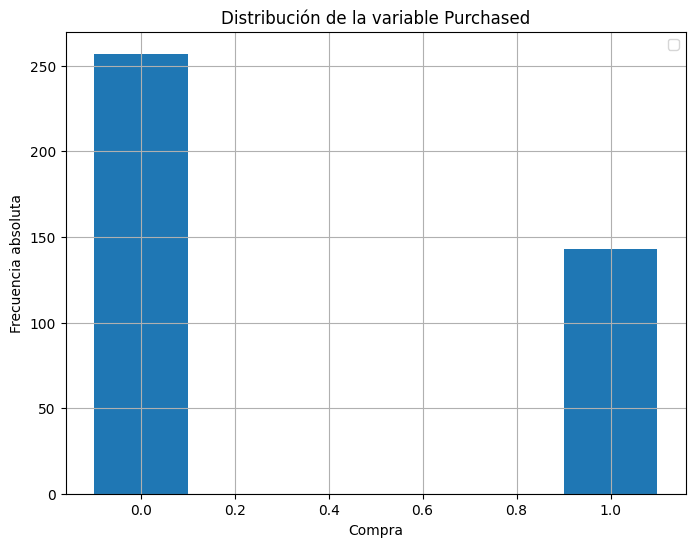

In [63]:
dist_traget(social_net)

Observaciones: La cantidad de compras efectuadas es aproximadamente el 55% de la cantidad de compras no efectuadas (casi la mitad), lo que nos lleva pensar que objetivo está desbalanceada.

In [65]:
# Correlacion entre las caracterisiticas
def mapa_corr(df):
  """
  Grafica el campo dicretizado de
  índices de correlación entre las
  características del Data Set.

  :param:
  :df: DataFrame con los atributos.
  """
  try:
    plt.figure(figsize=(8, 6))
    correlacion = df.iloc[:, 1:].corr().round(1)
    sns.heatmap(data=correlacion, annot=False, cmap='RdBu_r', linewidths=0.5, vmin=-1, vmax=1)
    plt.show()

  except:
    print('No se pudo realizar el mapa de correlación.')

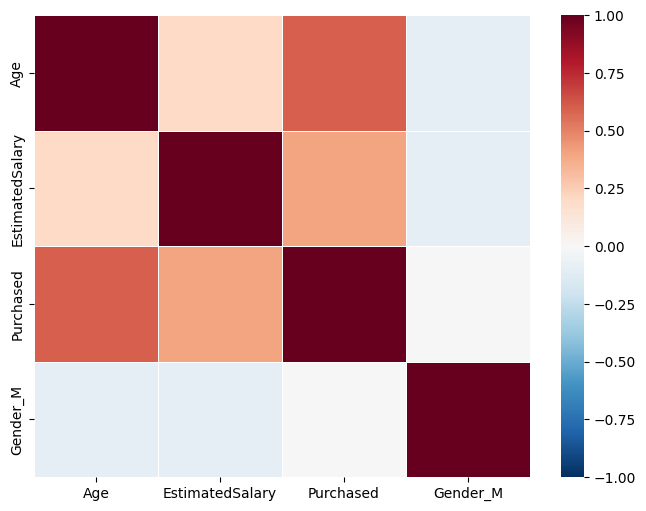

In [66]:
mapa_corr(social_net)

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\fabri\App

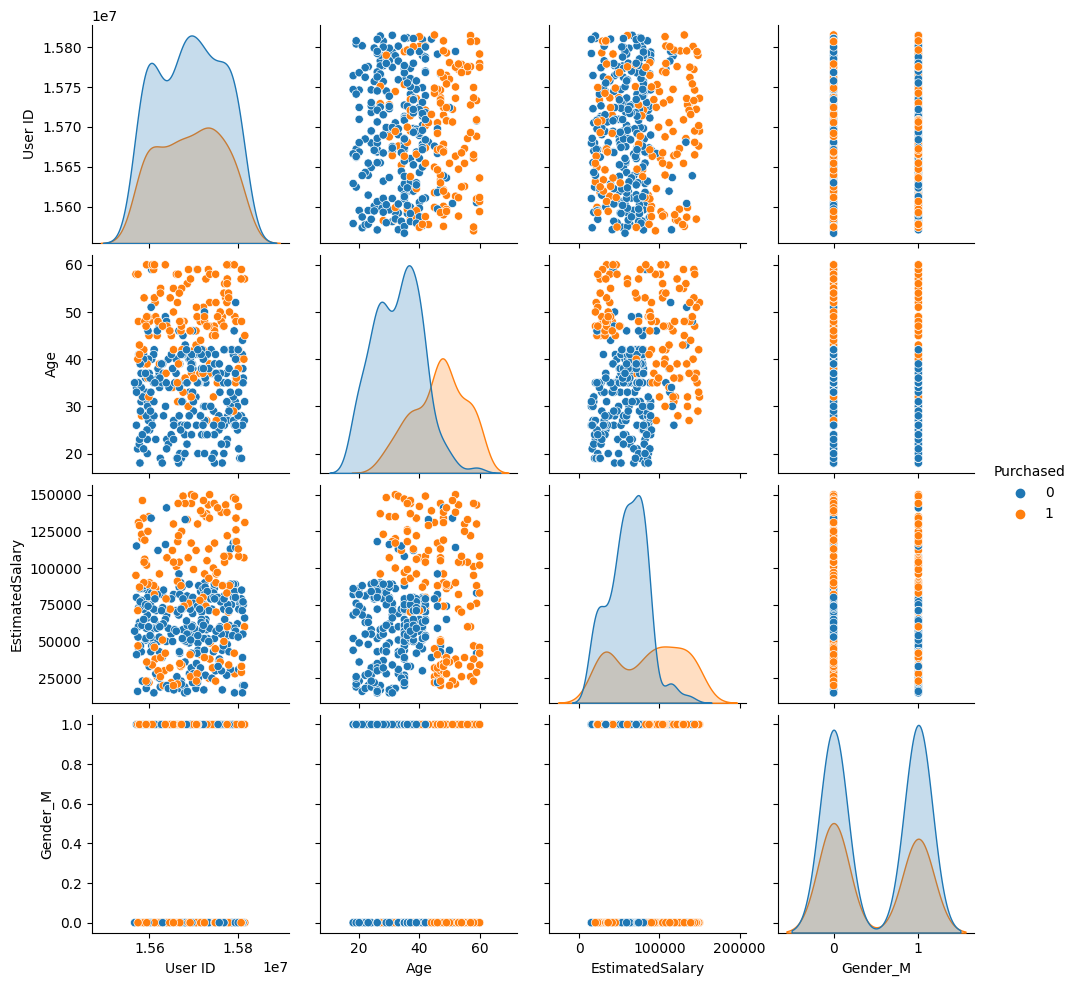

In [67]:
# Crear pairplot
sns.pairplot(social_net, hue='Purchased')
plt.show()

Observaciones: El índice de correlación da más cercano a 1 en el caso de la relación Age/Purchased que en el caso de EstimatedSalary/Purchased, como lo cual Age parece ser mejor. Además, muy baja relación lineal entre Gender_M/Purchased, lo que da a entender que 'Gender' no tiene peso (linalmente hablando) sobre 'Purcahsed'. Por otro lado, a traves de 'paiplots', se pudo observar que la combinación de age/EstimatedSalary es una buena combinación para separa las clases de la variable objetivo.

In [76]:
# Guardado del dataframe procesado
def guardar(df, path):
  """
  Guarda el data frame con los datos procesados
  en un archivo con terminación xlsx.

  :param:
  :df: DataFrame con los atributos.
  """
  try:
    df.to_csv(path, index=False)
  
  except:
    print('No se han podido persistir los datos.')

In [77]:
ruta_datos = os.path.join(ruta, "dataset/Social_Network_Ads_procesados.csv")

guardar(social_net, ruta_datos)